# Sentiment Analyses on Tweet Data

At this point we have all the processed (or not) and translated tweet data ready to be passed to the VADER sentiment Analyzer.
VADER will be used to get the compound sentiment of each tweet. For this notebook the mean of every day in every language
 will be taken and plotted.

In [1]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
from tqdm.notebook import tqdm

In the below cell we loop for each tweet text file and get the compound sentiment. When all the tweets for the day are
analyzed the mean is taken and stored.

In [2]:
from collections import defaultdict
nltk.download('vader_lexicon')
LanguageP = defaultdict(lambda: [])
LanguageNP = defaultdict(lambda: [])
for i in tqdm([0,1,2]):
    for j in [1,2,3,4]:
        # Processed Analysis Step
        tweetsP = pd.read_json('Data/Text/Processed/' + str(i) + str(j) + '.json').T
        results = []
        for text in tweetsP['text']:
            pol_score = SIA().polarity_scores(text) # run analysis
            pol_score['text'] = text # add headlines for viewing
            results.append(pol_score)

        tweetsP['Score'] = pd.DataFrame(results)['compound']
        LanguageP[j].append(np.average(tweetsP['Score']))

        # Not Processed Analysis Step
        tweetsNP = pd.read_json('Data/Text/NotProcessed/' + str(i) + str(j) + '.json').T
        results = []
        for text in tweetsNP['text']:
            pol_score = SIA().polarity_scores(text) # run analysis
            pol_score['text'] = text # add headlines for viewing
            results.append(pol_score)

        tweetsNP['Score'] = pd.DataFrame(results)['compound']
        LanguageNP[j].append(np.average(tweetsNP['Score']))

[nltk_data] Downloading package vader_lexicon to C:\Users\Aiden
[nltk_data]     Williams\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  0%|          | 0/3 [00:00<?, ?it/s]

# Plotting

At this stage its important to plot the results so that we can get a better idea of the differences between the processed and
not processed tweet data.

In [3]:
# Set up the multiplex library

from multiplex import drawable
import importlib
import os
import sys
import matplotlib.pyplot as plt
drawable = importlib.reload(drawable)
# reload the style
plt.style.use(os.path.join(sys.path[0], 'styles', "multiplex.style"))

# create a general style
style = { 'linewidth': 2, 'label_style': { 'fontweight': 500 } }

processed_style = { 'color': '#008000', 'label': 'Processed' }
not_processed_style = { 'color': '#cd7f32', 'label': 'Not Processed' }

# English Process vs Not Processed

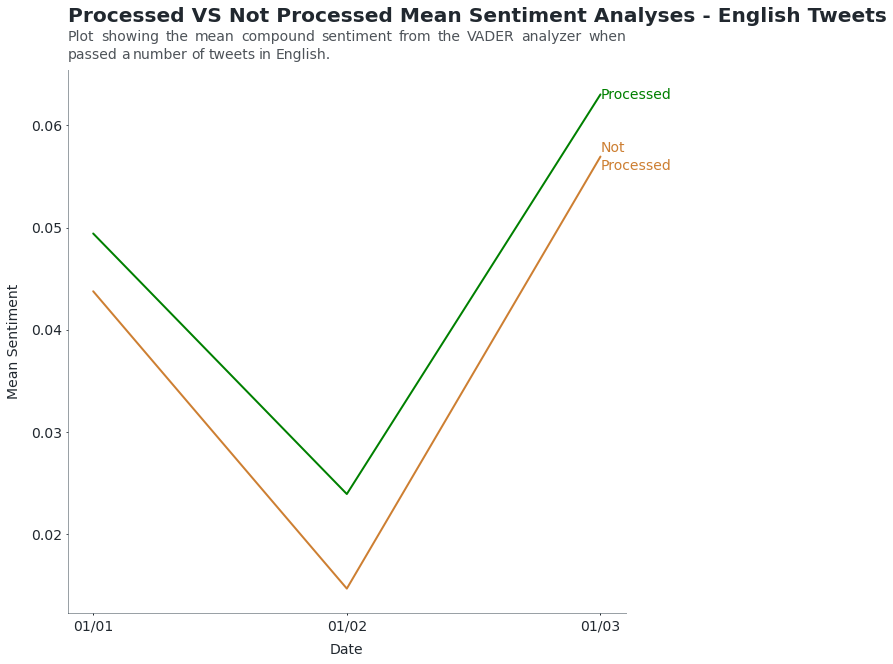

In [4]:
figure = plt.figure(figsize=(10, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 3), LanguageP[1], **style, **processed_style)
viz.draw_time_series(range(0, 3), LanguageNP[1], **style, **not_processed_style)

plt.xticks(range(0, 3), ['01/01', '01/02', '01/03'])
viz.set_xlabel('Date')
viz.set_ylabel('Mean Sentiment')

viz.set_title('Processed VS Not Processed Mean Sentiment Analyses - English Tweets', loc='left')
viz.set_caption("Plot showing the mean compound sentiment from the VADER analyzer when passed a number of tweets in English.", align='justify')
viz.savefig(fname='Output/English Process VS Not Processed',dpi=300, bbox_inches='tight')
viz.show()

# Spanish Process vs Not Processed

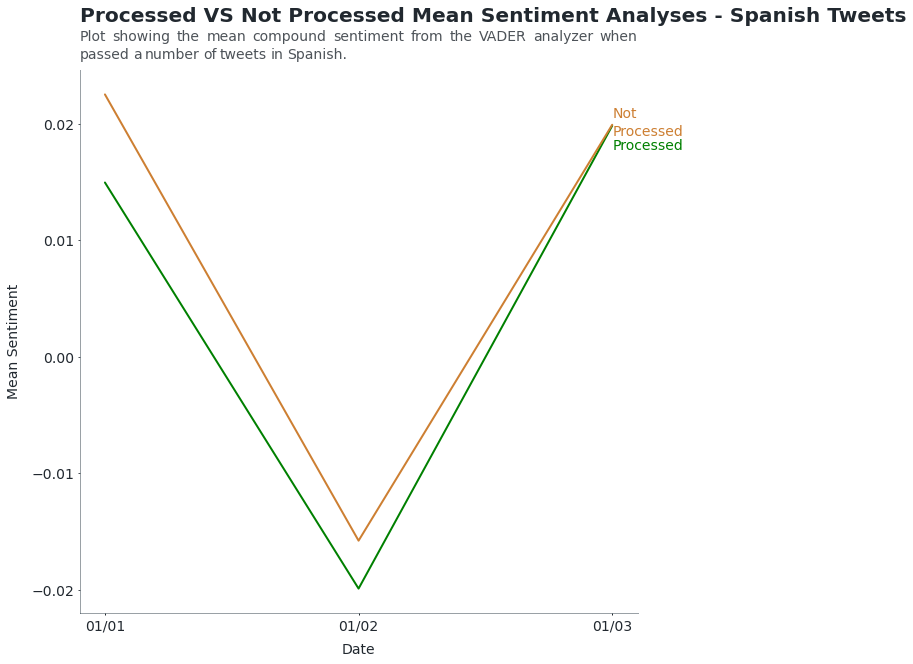

In [5]:
figure = plt.figure(figsize=(10, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 3), LanguageP[2], **style, **processed_style)
viz.draw_time_series(range(0, 3), LanguageNP[2], **style, **not_processed_style)

plt.xticks(range(0, 3), ['01/01', '01/02', '01/03'])
viz.set_xlabel('Date')
viz.set_ylabel('Mean Sentiment')

viz.set_title('Processed VS Not Processed Mean Sentiment Analyses - Spanish Tweets', loc='left')
viz.set_caption("Plot showing the mean compound sentiment from the VADER analyzer when passed a number of tweets in Spanish.", align='justify')
viz.savefig(fname='Output/Spanish Process VS NotProcessed',dpi=300, bbox_inches='tight')
viz.show()

# French Process vs Not Processed

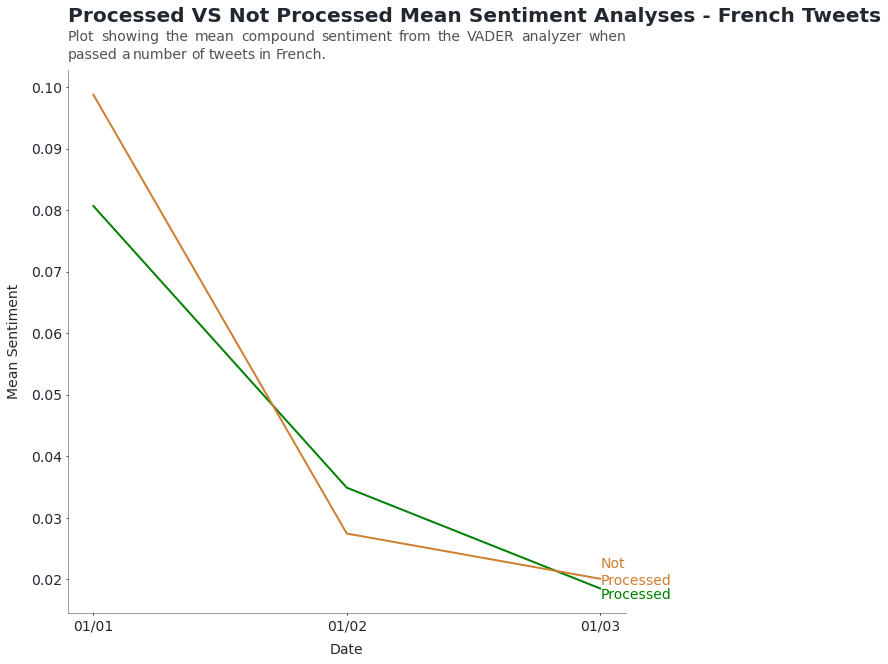

In [6]:
figure = plt.figure(figsize=(10, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 3), LanguageP[3], **style, **processed_style)
viz.draw_time_series(range(0, 3), LanguageNP[3], **style, **not_processed_style)

plt.xticks(range(0, 3), ['01/01', '01/02', '01/03'])
viz.set_xlabel('Date')
viz.set_ylabel('Mean Sentiment')

viz.set_title('Processed VS Not Processed Mean Sentiment Analyses - French Tweets', loc='left')
viz.set_caption("Plot showing the mean compound sentiment from the VADER analyzer when passed a number of tweets in French.", align='justify')
viz.savefig(fname='Output/French Process VS NotProcessed',dpi=300, bbox_inches='tight')
viz.show()

# German Process vs Not Processed

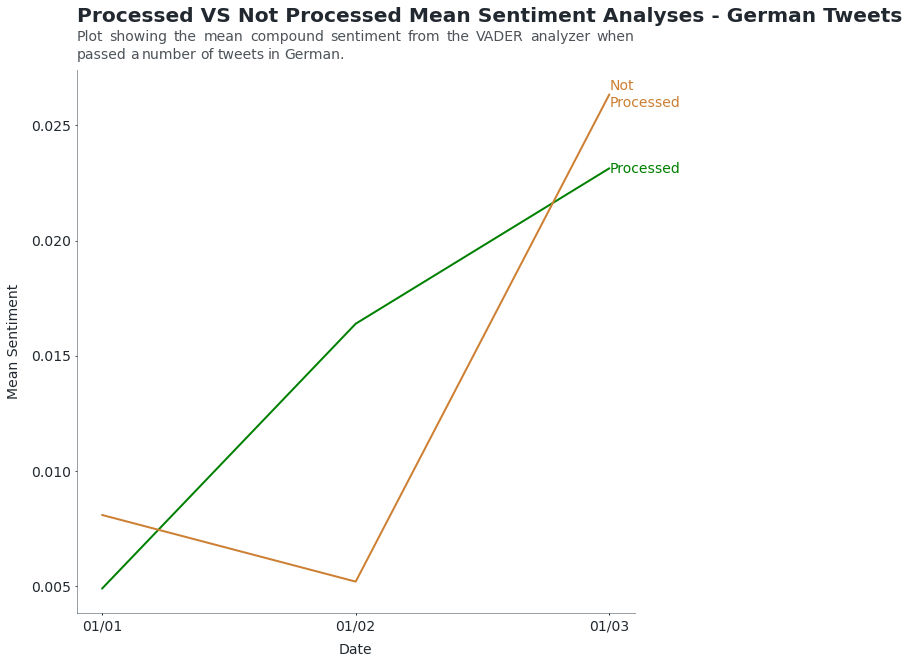

In [7]:
figure = plt.figure(figsize=(10, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 3), LanguageP[4], **style, **processed_style)
viz.draw_time_series(range(0, 3), LanguageNP[4], **style, **not_processed_style)

plt.xticks(range(0, 3), ['01/01', '01/02', '01/03'])
viz.set_xlabel('Date')
viz.set_ylabel('Mean Sentiment')

viz.set_title('Processed VS Not Processed Mean Sentiment Analyses - German Tweets', loc='left')
viz.set_caption("Plot showing the mean compound sentiment from the VADER analyzer when passed a number of tweets in German.", align='justify')
viz.savefig(fname='Output/German Process VS NotProcessed',dpi=300, bbox_inches='tight')
viz.show()

The plots give a good idea however the difference varies and at times the difference is very small >1%. So I add up the
processed and not processed mean compound sentiment analyses and print the difference.

In [8]:
P = 0
for l in LanguageP:
    for p in LanguageP[l]:
        P += p

NP = 0
for l in LanguageNP:
    for p in LanguageNP[l]:
        NP += p

print(P)
print(NP)
print(P-NP)

0.3297441254212561
0.3279508189644337
0.0017933064568224077


The resulting difference is of 0.1% which I do not consider significant enough to remove pre-processing. However the
preprocess function in the Tweets class will be amended to keep more features like emojis and hashtags.
